#Motor dimensions

There are two traction motor so the torque and the power must be divided to two.

**270kW/2=135 kW**

**406Nm/2=203 Nm**

The motors are 3 phase

I assumed that efficiency≅0.9 due to that “Tesla's electric motor is not just a great generator of torque - it is able to create torque efficiently. The Roadster achieves an overall driving efficiency of 88%, about three times the efficiency of a conventional car.” 

if efficiency of the car is %88, motor efficiency would be %94 but i selected %90 
http://my.teslamotors.com/roadster/technology/motor


**Ds=**stator inner diameter  

**leff=**core effective lenght

**p=**pole number (not pole pair)

**ns**=stator speed rpm

**A=**electrical loading

**m=** # of phases (3 phases)

####I assumed that flux is sinusoidal


f=(p*n_s)/120

##$x=\frac{p*ns}{120}$

##$\frac{S}{n_{eff}*cosθ}$=$\ m*V _{phase}*I_ {phase} $

##$I_{phase}=\frac{(A*π*D_s)}{(2*N_s*m)}$

##$\ V _{phase} $=$ N_s*2*pi*f*k_w*B_{max}*\frac{2}{pi}*\frac{pi*D_s}{p}*l_{eff}*I_{phase}*\frac1{{\sqrt{2}}}$

## $\frac{S}{(n_{eff}*cosθ*k_w} )=\frac{√2 π^2}{120*}n_s*B_{max}*A*D_s^2* l_{eff}$

I assumed that B_max=0.8 at airgap and A=40000 kA/m

In [8]:
import math
pi=3.1415927
Vm=135000/0.9/0.9/0.9/math.sqrt(2)/(pi**2)*120/6000/0.8/40000 #Vm Ds^2*leff
print Vm # m^3

0.00829223309196


##$ \frac{D_s-2g}{l_{eff}}=\frac {pi}{p}*(p/2)^{1/3} $


In [22]:
p=4
ratio=pi/p*((2)**(1.0/3.0)) # Dr/leff is ratio
print ratio

0.989539693232


## $ D_s ≅l_{eff} $

In [38]:
Ds=Vm**(1.0/3.0)  #stator diameter in meter
print Ds


0.202406210427


## $ σ_{tan}=\frac {2T}{π*Ds^2*l}$

In [112]:
T=441.0/2.0 # due to double motor
leff=Ds
tangentialstress=2.0*T/(pi*Ds*Ds*leff)
print tangentialstress # F/m2

16928.4505364


it is in the range of table 6.4 lecture book. 12000< tan.stress< 330000

###grafik denemeleri

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

[ 0.          1.66666667  3.33333333  5.        ]


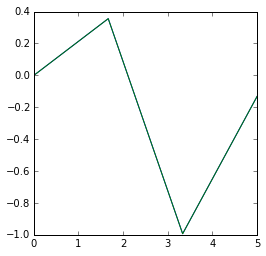

In [177]:
t = np.linspace(0.0,5.0,4);
plt.plot(t,np.sin(t**2))
fig = plt.plot(t,np.sin(t**2))
from pylab import rcParams
rcParams['figure.figsize'] = 4, 4
print t

## Airgap length Selection

In [113]:
Speedperipheral=0.202*pi*6000/60
print Speedperipheral # m/s

63.46017254


**63.5 m/s < 100 m/s so eq. 6.26 in the book is not valid for the motor**

Equation 6.24 for p>2 for 50 hertz machines

##$ lg=\frac{0.18+0.006*P^{0.4}}{1000} $ 

In [118]:
P=135000 # power output of the motor
lg=(0.18 +0.006*P**0.4)/1000
print lg  # meter
print lg*1000

0.000856526414178
0.856526414178


Equation from B.E notes $ g=0.2+2√(D_s*l)≅0.604 mm $

***I choose airgap as o.9 mm due to 200 hertz>50 hertz***

In [119]:
Dr=Ds-2*lg
print Dr  # meter Diameter of the rotor

0.200693157598


## Choosing Slot Number

1-In tesla, slot number is 48. 

2-From table 6.7 page 309      slot pitch for IM is 7-45mm

3-From B.E notes slot-pitch must be greater 10-15 mm for mechanical considerations


## I choose 10 mm as a limitation

In [122]:
slotnumber= Ds*pi/12*1000
print slotnumber

52.9898227593


**multiple of 12 (3*4) is possible slot number which is smaller than 63. so possible slot numbers are 48,36,24 **

48 and 36 is optimum slot number due to increasing slot number cause well distributed mmf in air gap and low harmonic content

#### After comparison of kw value of 48 and 36 slot number will be choosen

### 3.harmonics are destroyed by the motor winding so below the calculations of kw , ignore the second value(3.harmonics and multiples 9)

In [233]:
#this is for #of slot 48 and 165 degree chording
slotnumber= 48.0
q=slotnumber/12.0
x = np.arange(1,13,2)
teta=180/(slotnumber/4)
kd=(np.sin(x*180/slotnumber*q*math.pi/180))/(q*(np.sin(x*180/slotnumber*math.pi/180)))
kc=np.sin(x*(180-teta)/2*math.pi/180)  
print kd*kc
print  x    # harmonic numbers         


[ 0.98085831 -0.8371526   0.59600684 -0.3323725   0.12176591 -0.01280916]
[ 1  3  5  7  9 11]


In [235]:
#this is for #of slot 48 and 150 degree chording
slotnumber= 48.0
q=slotnumber/12.0
x = np.arange(1,13,2)
teta=180/(slotnumber/4)
kd=(np.sin(x*180/slotnumber*q*math.pi/180))/(q*(np.sin(x*180/slotnumber*math.pi/180)))
kc=np.sin(x*(180-2*teta)/2*math.pi/180)  
print kd*kc
print  x    # harmonic numbers     


[ 0.95561177 -0.64072886  0.19443785  0.14131042 -0.22499406  0.09479093]
[ 1  3  5  7  9 11]


In [236]:
#this is for #of slot 48 and 135 degree chording
slotnumber= 48.0
q=slotnumber/12.0
x = np.arange(1,13,2)
teta=180/(slotnumber/4)
kd=(np.sin(x*180/slotnumber*q*math.pi/180))/(q*(np.sin(x*180/slotnumber*math.pi/180)))
kc=np.sin(x*(180-3*teta)/2*math.pi/180)  
print kd*kc
print  x    # harmonic numbers     


[ 0.91401444 -0.34675996 -0.287491    0.50442116 -0.2939689   0.03755456]
[ 1  3  5  7  9 11]


In [256]:
#this is for #of slot 36 and 160 degree chording
slotnumber= 36.0
q=slotnumber/12.0
x = np.arange(1,13,2)
teta=180/(slotnumber/4)
kd=(np.sin(x*180/slotnumber*q*math.pi/180))/(q*(np.sin(x*180/slotnumber*math.pi/180)))
kc=np.sin(x*(180-1*teta)/2*math.pi/180)  
print kd*kc
print  x    # harmonic numbers     


[  9.74833458e-01  -7.88675135e-01   4.89713144e-01  -1.91991900e-01
  -1.63286240e-16   3.60215288e-02]
[ 1  3  5  7  9 11]


In [257]:
#this is for #of slot 36 and 140 degree chording
slotnumber= 36.0
q=slotnumber/12.0
x = np.arange(1,13,2)
teta=180/(slotnumber/4)
kd=(np.sin(x*180/slotnumber*q*math.pi/180))/(q*(np.sin(x*180/slotnumber*math.pi/180)))
kc=np.sin(x*(180-2*teta)/2*math.pi/180)  
print kd*kc
print  x    # harmonic numbers    

[ 0.93017526 -0.4553418  -0.13229532  0.43001657 -0.33333333  0.08067973]
[ 1  3  5  7  9 11]


**i analyzed the slot number effect on kw, the bigger machine means more slot then high first kw and low other harmonics** 
burasi bitmedi array yazmayi ogrenince

In [265]:
#EKSIK TAMAMLA
slotnumber= 72.0
q=slotnumber/12.0
x = np.arange(1,13,2)
x = np.arange(1,13,2)
teta=180/(slotnumber/4)
kd=(np.sin(x*180/slotnumber*q*math.pi/180))/(q*(np.sin(x*180/slotnumber*math.pi/180)))
kc=np.sin(x*(180-3*teta)/2*math.pi/180)  
print kd*kc
print  x    # harmonic numbers  

[ 0.95523273 -0.63844146  0.19250943  0.1385629  -0.21776049  0.09023669]
[ 1  3  5  7  9 11]


### slot number is chosen as a 48 and 150 degree chording (two slots)

###kw=[ 0.95561177 ,  0.19443785,  0.14131042 ,  0.09479093] (1,5,7,11)

SyntaxError: invalid syntax (<ipython-input-269-d0dc848b5a37>, line 2)